# Homework 4: Feature Selection/Engineering (50 points)

Please complete this notebook by filling in the cells provided.

The solved homework should be uploaded to Gradescope as an .ipynb file. DO NOT put your answers in more than one file or use a different file extension.

**<u>Deadline</u>**:

This assignment is due on **Friday, April 19** at **11:59pm**.

- Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

- You should start early so that you have time to get help if you're stuck.

- Submit your homework 30-60 minutes to ensure that it will upload before the deadline.

- Please run all of your code cells and ensure all of your answers are outputted and visible to graders.

- Check the file preview on Gradescope to make sure all of your answers are visible.

- Be mindful of your file sizes. Do not print out entire large datasets use .head or .tail instead. Make sure your document is visible in the Gradescope preview.

- Your functions should have a docstring. Points may be taken off for not including a docstring.

- Your graphs should be labeled with a title, x-label, and y-label and be otherwise readable. Intervals on x- and y-axises should make sense for the data. If these items are missing, points may be taken off.

In [1]:
# Don't change this cell; just run it. 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#you will find the following useful
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import KFold

## Predicting Diamond Prices (50 points) 

The diamonds.csv file on Canvas is a classic dataset contains the prices and other variables of almost 54,000 diamonds. The goal of this dataset is to predict the price of diamonds using these variables.

- **price:** price in US dollars (\$326-\$18,823)

- **carat:** weight of the diamond (0.2-5.01)

- **cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- **color:** diamond colour, from J (worst) to D (best)

- **clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- **x:** length in mm (0-10.74)

- **y:** width in mm (0-58.9)

- **z:** depth in mm (0-31.8)

- **depth:** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)

- **table:** width of top of diamond relative to widest point (43-95)

In [2]:
diamond_df=pd.read_csv("../data/diamonds.csv")
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Question 1. (8pts)** Carry out some exploratory data analysis, including calculating summary statistics (2 pts), correlation matrices (and justification of colinearity) (2 pts), and at minimum plotting the distribution of the response variable (2 pts). Once you’ve finished with your exploratory analysis, make sure to perform any necessary data cleaning/wrangling (i.e., converting categorical variables to indicators (2pts).

In [4]:
#Dealing with Categorical Variables, Renaming First Column

diamond_df_final = pd.get_dummies(diamond_df, columns = ['cut', 'color', 'clarity'], dtype = 'float', drop_first = True)

print(diamond_df_final.columns)
diamond_df_final = diamond_df_final.rename(columns={'Unnamed: 0': 'ID'})
diamond_df_final.head()

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')


,ID,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
#Summary of Statistics
diamond_df_final.describe()

,ID,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,...,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.090953,0.399537,...,0.153949,0.100519,0.052058,0.033185,0.242214,0.170449,0.151483,0.227253,0.067760,0.093919
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.287545,0.489808,...,0.360903,0.300694,0.222146,0.179121,0.428427,0.376030,0.358522,0.419061,0.251337,0.291719
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#Correlation Matrix
diamond_df_final.corr()

,ID,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
ID,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208,-0.044601,0.108812,...,-0.065322,-0.043354,-0.051648,0.078778,-0.050275,-0.160590,0.026121,0.030002,0.094045,0.090003
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.034196,-0.163660,...,0.102465,0.161494,0.180054,-0.114449,0.062669,0.267483,-0.063094,-0.038904,-0.167571,-0.137024
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.136114,-0.022778,...,0.026037,0.022630,0.022543,-0.030881,0.040899,0.007202,-0.024169,-0.009459,-0.023477,-0.019243
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.175174,-0.549599,...,0.011574,0.017967,0.037253,-0.078766,0.051959,0.095344,-0.026858,-0.009655,-0.069103,-0.062273
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,-0.000312,-0.097175,...,0.059223,0.097125,0.081710,-0.049596,0.008957,0.128420,-0.009886,-0.001062,-0.095266,-0.052381
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.030349,-0.162674,...,0.095896,0.146522,0.164658,-0.125976,0.079241,0.270827,-0.059882,-0.035507,-0.185253,-0.147151
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.032187,-0.153158,...,0.093480,0.142895,0.160776,-0.120800,0.076097,0.263252,-0.056490,-0.035928,-0.179271,-0.141624
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.045169,-0.158688,...,0.095041,0.145276,0.164217,-0.125248,0.081005,0.263192,-0.058513,-0.036314,-0.182401,-0.144746
cut_Good,-0.044601,0.034196,0.136114,0.175174,-0.000312,0.030349,0.032187,0.045169,1.000000,-0.258018,...,-0.009517,0.006187,0.014977,-0.033046,0.055938,0.041970,-0.017116,-0.021063,-0.037564,-0.038627
cut_Ideal,0.108812,-0.163660,-0.022778,-0.549599,-0.097175,-0.162674,-0.153158,-0.158688,-0.258018,1.000000,...,-0.021264,-0.009225,-0.038490,0.104986,-0.082865,-0.108242,0.034247,0.015669,0.088354,0.075508


There seem to be multiple predictors in this dataset that could be considered collinear. For example, some of the more intuitive collinear relationships include carat weight ('carat') and length, width, and depth of the carat (x, y, z: r ~ 0.97, 0.95, and 0.95 respectively). Moreover, 'price' and variables having to do with carat size seem to have very positive relationships, which, perhaps, foreshadows that combining/removing some of these size variables could be advantageous in limiting unidentifiability and instability in my model.

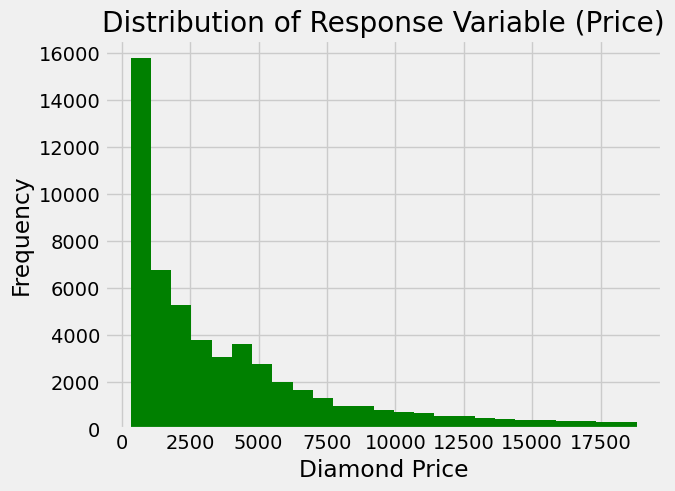

In [7]:
plt.hist(diamond_df_final.price, bins = 25, color = 'green')

plt.title('Distribution of Response Variable (Price)')
plt.xlabel('Diamond Price')
plt.ylabel('Frequency')

plt.show()

**Question 2. (8pts)** Continuing your data cleaning and exploration, consider your numerical variables above and determine if transforming those variables (using log, sqrt, or polynomial transformations) will help your regression model. To do this, create a scatterplot of each predictor against the response (you don't need to show all of the possible combinations you try, but **include a sentence summary of what you choose**).

*Note, even though transforming the response variable might be useful for a single variable, since we are constructing a multiple linear regression, in order to transform the response, you must consider that transformation with every variable in your model. (You can still perform a transformation for the response, just be aware this change the response for each input.*

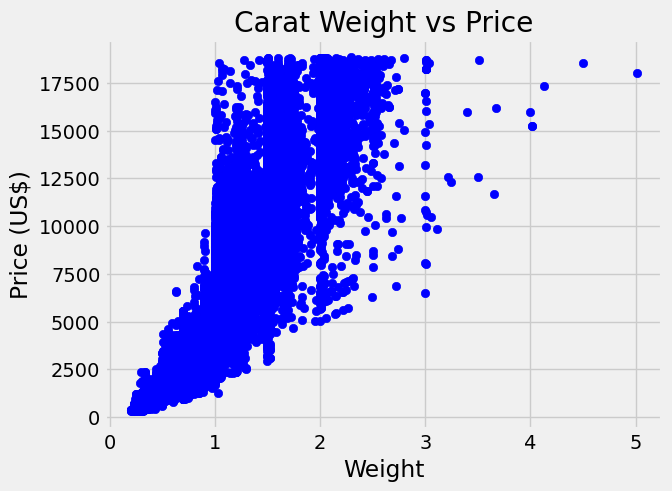

In [18]:
plt.scatter(diamond_df_final.carat, diamond_df_final.price, color = 'blue')
plt.title('Carat Weight vs Price')
plt.xlabel('Weight')
plt.ylabel('Price (US$)')

plt.show()

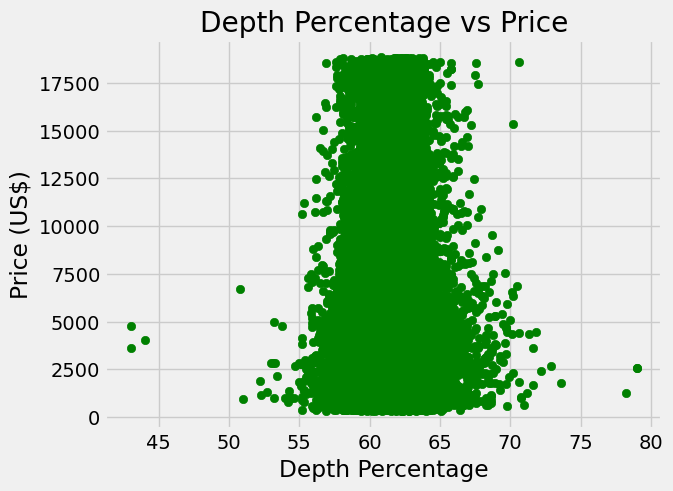

In [19]:
plt.scatter(diamond_df_final.depth, diamond_df_final.price, color = 'green')
plt.title('Depth Percentage vs Price')
plt.xlabel('Depth Percentage')
plt.ylabel('Price (US$)')

plt.show()

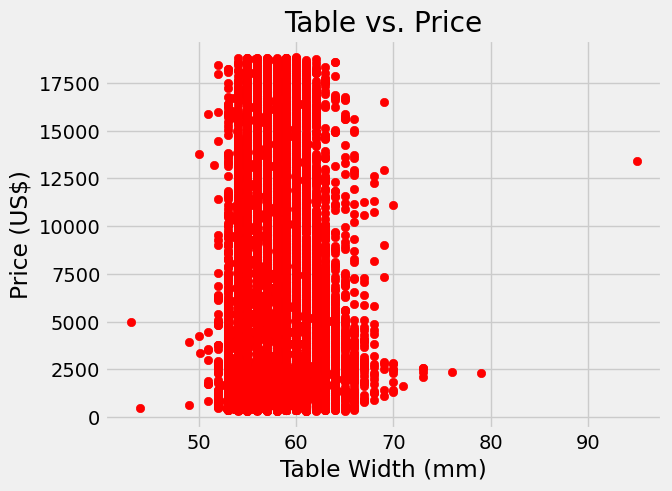

In [20]:
plt.scatter(diamond_df_final.table, diamond_df_final.price, color = 'red')
plt.title('Table vs. Price')
plt.xlabel('Table Width (mm)')
plt.ylabel('Price (US$)')

plt.show()

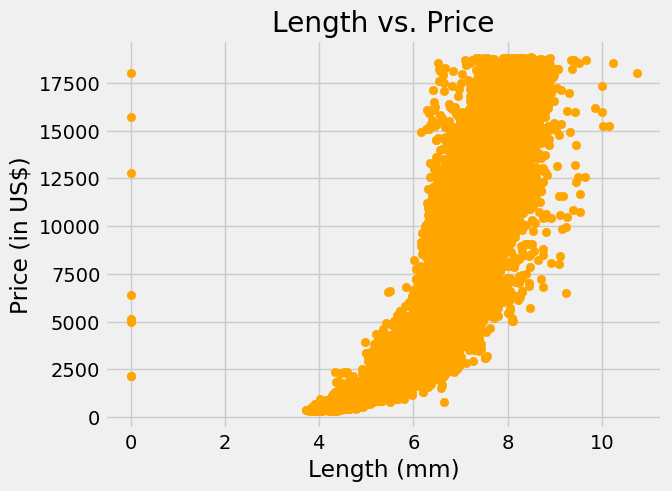

In [22]:
plt.scatter(diamond_df_final.x, diamond_df_final.price, color = 'orange')
plt.title('Length vs. Price')
plt.xlabel('Length (mm)')
plt.ylabel('Price (in US$)')

plt.show()

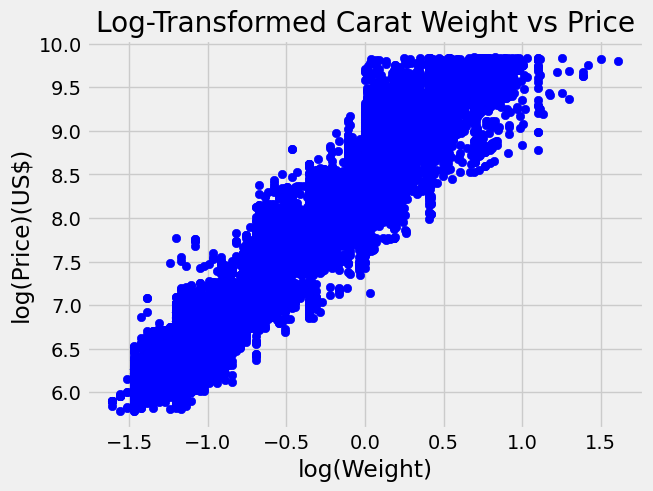

In [36]:
plt.scatter(np.log(diamond_df_final.carat), np.log(diamond_df_final.price), color = 'blue')
plt.title('Log-Transformed Carat Weight vs Price')
plt.xlabel('log(Weight)')
plt.ylabel('log(Price)(US$)')

plt.show()

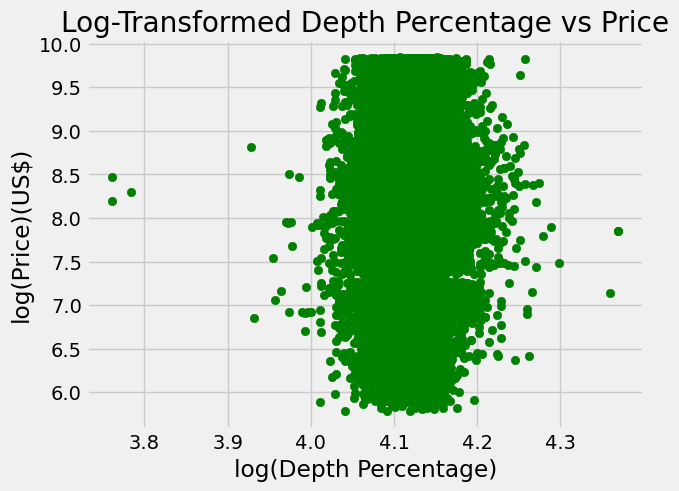

In [37]:
plt.scatter(np.log(diamond_df_final.depth), np.log(diamond_df_final.price), color = 'green')
plt.title('Log-Transformed Depth Percentage vs Price')
plt.xlabel('log(Depth Percentage)')
plt.ylabel('log(Price)(US$)')

plt.show()

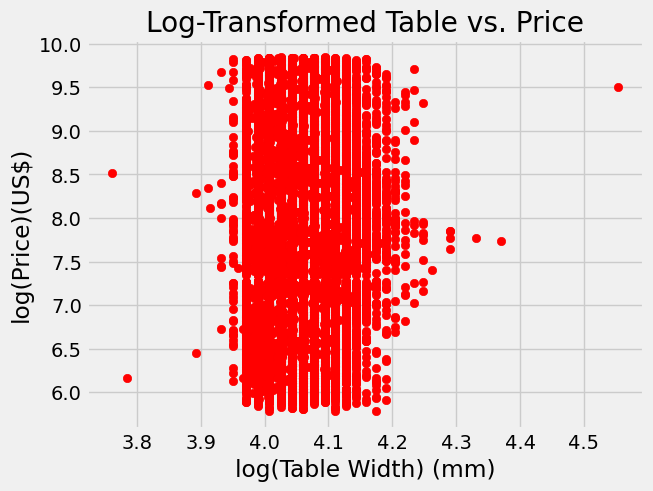

In [39]:
plt.scatter(np.log(diamond_df_final.table), np.log(diamond_df_final.price), color = 'red')
plt.title('Log-Transformed Table vs. Price')
plt.xlabel('log(Table Width) (mm)')
plt.ylabel('log(Price)(US$)')

plt.show()

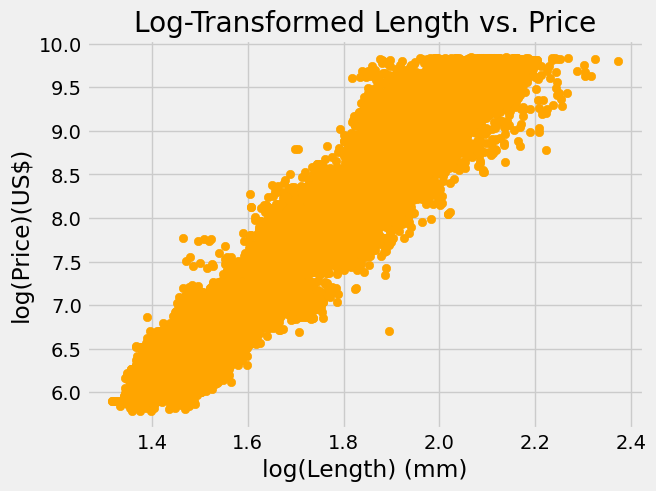

In [40]:
plt.scatter(np.log(diamond_df_final.x), np.log(diamond_df_final.price), color = 'orange')
plt.title('Log-Transformed Length vs. Price')
plt.xlabel('log(Length) (mm)')
plt.ylabel('log(Price)(US$)')

plt.show()

The log-transformed carat size and length (x) models exhibit the most promising linear correlation with log(price), rendering them prime candidates for inclusion in a linear regression model. Other predictors may necessitate further exploration or alternative modeling strategies. Regarding alternative models, the log transformation of depth does not demonstrate as distinct a linear pattern with price as carat does. Although the log-transformed scatterplot of table versus price reveals a small degree of positive correlation, the data points cluster heavily in the middle of the plot, with some dispersion that does not imply a robust linear relationship. It makes sense that 'carat' and 'x' would share similar patterns, given that, intuitively, the length of a carat is directly linked to its weight. It seems fair to assume that 'y' and 'z' would exhibit similar patterns to 'x' and 'carat'.

In the next problems, you will be fitting different models, that is *training* your data. Run the following lines of code to split the data into training and test dataset. Note, you might need to transform the data dependent on which model you are using.

In [43]:
from sklearn.model_selection import train_test_split

In [49]:
X = diamond_df_final.drop(columns=['price'])
y = diamond_df_final.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 
#you can subset the X_train and y_train data for the predictors you choose

**Question 3. (10pts)** Fit a least squares multiple regression model predicting price. Try at least 5 combinations of predictor variables to find one that you think fits the data well. Use your answers from Q1 and Q2 above to help you decide. *You do not have to formally test if a variable is linearly significant via hypothesis test for this example.*

Hint: Do not try to use LOO CV, it will take too long on this data. Try k-fold instead on the training data. 

In [54]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

kf = KFold(n_splits=5, random_state=123, shuffle=True)

combinations = [['carat', 'cut_Premium', 'color_I', 'clarity_VVS2', 'depth'],
                ['x', 'y', 'z', 'cut_Good', 'color_J'], 
                ['carat', 'cut_Very Good', 'color_H', 'clarity_SI1', 'table'],
                ['carat', 'table', 'cut_Ideal', 'color_G', 'clarity_SI2'],
                ['carat', 'depth', 'table', 'x', 'clarity_VS1']]
    
for i, combo in enumerate(combinations, start=1):
    X_combo = X_train[combo]
    
    model = LinearRegression()

    mse_scores = -cross_val_score(model, X_combo, y_train, cv=kf, scoring='neg_mean_squared_error')
    
    avg_mse = np.mean(mse_scores)
    
    print(f"Model {i}: {combo}")
    print(f"Average MSE: {avg_mse}")

    model.fit(X_combo, y_train)
    y_pred = model.predict(X_test[combo])
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Test MSE: {mse}\n")

Model 1: ['carat', 'cut_Premium', 'color_I', 'clarity_VVS2', 'depth']
Average MSE: 2239195.749681892
Test MSE: 1502.3944286444662

Model 2: ['x', 'y', 'z', 'cut_Good', 'color_J']
Average MSE: 3439154.9943489046
Test MSE: 1817.19006134562

Model 3: ['carat', 'cut_Very Good', 'color_H', 'clarity_SI1', 'table']
Average MSE: 2317635.0897835484
Test MSE: 1522.2943926795358

Model 4: ['carat', 'table', 'cut_Ideal', 'color_G', 'clarity_SI2']
Average MSE: 2111845.481802374
Test MSE: 1450.9873439813284

Model 5: ['carat', 'depth', 'table', 'x', 'clarity_VS1']
Average MSE: 2208762.6116472743
Test MSE: 1486.2320055932548



**Question 4. (7pts)** Fit a ridge regression model predicting price (or log price, depending on what you think is most appropriate). Make sure you are investigating a range of tuning parameters and selecting the one that is most appropriate for the dataset via cross-validation.

Include a plot showing how the coefficients in the model change as the tuning parameter changes 

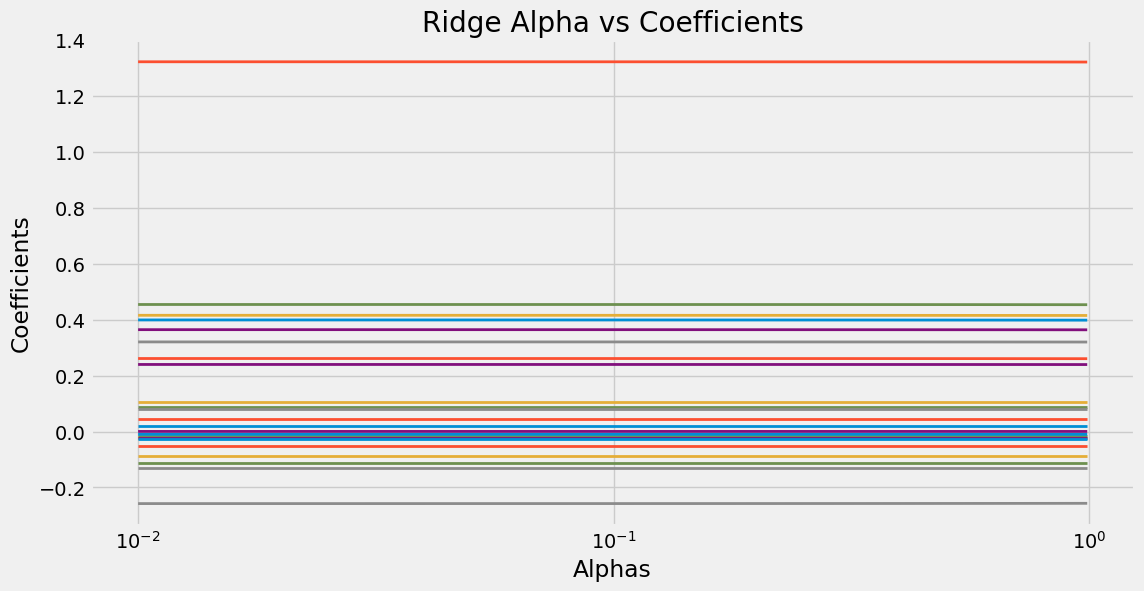

In [60]:
# code here and in additional cells if needed

scalerX = StandardScaler().fit(X_train) 

X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)

y_train_array = np.array(y_train).reshape(-1, 1)
scalerY = StandardScaler().fit(y_train_array)
y_train_scaled = scalerY.transform(y_train_array)

y_test_array = np.array(y_test).reshape(-1, 1)
y_test_scaled = scalerY.transform(y_test_array)

coefs = []
alphas = np.arange(0.01, 1, 0.01)

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train_scaled, y_train_scaled)
    coefs.append(model.coef_.flatten())

plt.figure(figsize=(12, 6))
plt.plot(alphas, coefs, linewidth=2)
plt.xlabel('Alphas')
plt.ylabel('Coefficients')
plt.title('Ridge Alpha vs Coefficients')
plt.xscale('log')

plt.show()

**Question 5. (7pts)** Fit a LASSO model predicting price (or log price, depending on what you think is most appropriate). Make sure you are investigating a range of tuning parameters and selecting the one that is most appropriate for the dataset via cross-validation. 

Again, include a plot showing how the coefficients in the model change as the tuning parameter changes 

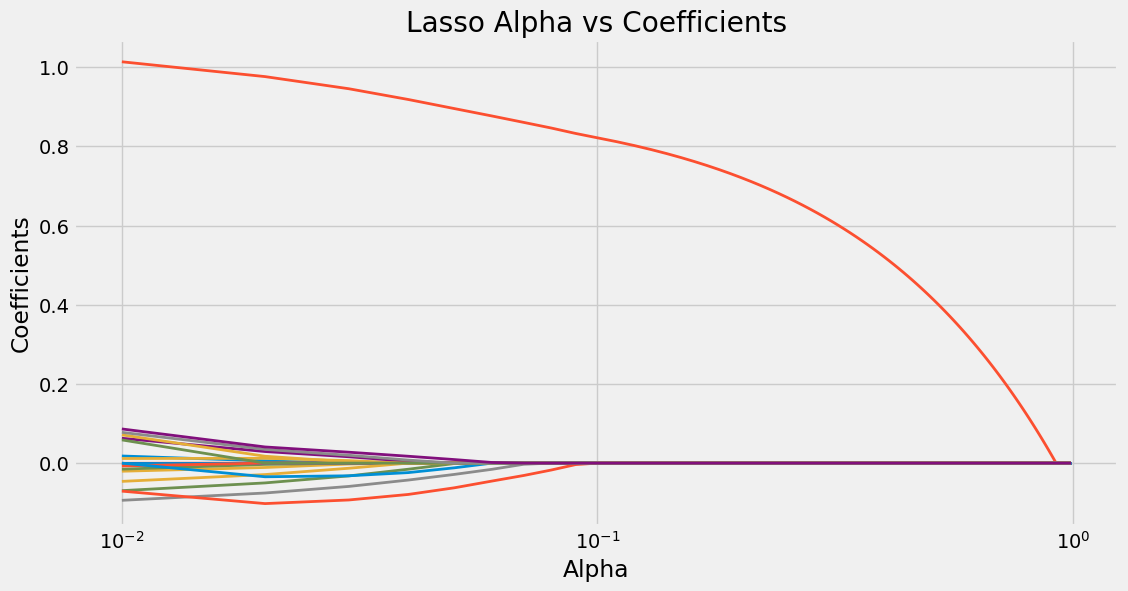

In [59]:
# code here and in additional cells if needed

scalerX = StandardScaler().fit(X_train)
X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)

scalerY = StandardScaler().fit(y_train.values.reshape(-1, 1))
y_train_scaled = scalerY.transform(y_train.values.reshape(-1, 1))

alphas = np.arange(0.01, 1, 0.01)
coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train_scaled)
    coefs.append(lasso.coef_)

plt.figure(figsize=(12, 6))
plt.plot(alphas, coefs, linewidth=2)
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Alpha vs Coefficients')
plt.xscale('log')

plt.show()

**Question 6. (5pts)** For each of your three models, your goal is to find the best of them. For each of your three models, calculate a 10-fold cross validation score. You can use whichever metric to calculate the score you like, however, it must be appropriate for the problem at hand and your settings must be consistent across all three models for proper comparison.

In [61]:
# code here and in additional cells if needed

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kf = KFold(n_splits=10, shuffle=True, random_state=123)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

results = {}
for name, model in models.items():
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    results[name] = np.mean(np.abs(cv_results))

for model, mse in results.items():
    print(f"{model}: Average MSE = {mse:.2f}")

Linear Regression: Average MSE = 1269994.99
Ridge Regression: Average MSE = 1269988.26
Lasso Regression: Average MSE = 1269894.98


In [67]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

models = {}

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()

linear_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)

models['Linear Regression'] = linear_model
models['Lasso'] = lasso_model
models['Ridge'] = ridge_model

mse_test_scores = {}
for model_name, model in models.items():
    mse = mean_squared_error(y_test, model.predict(X_test_scaled))
    mse_test_scores[model_name] = mse

for model_name, mse_test in mse_test_scores.items():
    print(f"{model_name} Test MSE: {mse_test:.2f}")

Linear Regression Test MSE: 1285614.96
Lasso Test MSE: 1285162.74
Ridge Test MSE: 1285602.26


**Question 7. (5pts)** Which model would you recommend for this data? Use the test data or interpretability to support your recommendation. 

It seems like the Lasso model has the lowest MSE, and therefore, it is the best choice to model this data based on the price of diamonds. Not only does it provide a slightly more accurate prediction, with the lowest MSE of 1285162.74 among all the models, but it also aids in enhancing the model's interpretability. Lasso Regression achieves this by simplifying the model through the exclusion of less significant features. This feature becomes especially beneficial in our scenario, where numerous factors could potentially impact diamond prices, but not all carry equal weight. Hence, for its blend of superior performance and streamlined simplicity, Lasso Regression emerges as the recommended choice.